# Analysis of the State Farm image data

This notebook provides analysis of the provided State Farm data


## Set up the environment
First, let's import what we need and set up environment variables, etc.

In [1]:
# Imports of the relevant libraries
import cv2
import numpy as np
import pandas as pd
import sys
import caffe
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# These are the locations of the images provided by Kaggle
train_image_source_dir = "./imgs/train"
test_image_source_dir = "./imgs/test"
driver_image_list = "./driver_imgs_list.csv"

# These are the locations of the images that we will work with 
train_image_working_dir = "./images/train"
valid_image_working_dir = "./images/validate"
test_image_working_dir = "./images/test"

## Create an inital CNN based on the AlexNet example
Starting with no pre-loaded weights though as we'll train this with our own data

In [28]:
caffe.set_mode_cpu()

model_def = './model/deploy.prototxt'
model_weights = './model/caffenet-kaggle-state-farm.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

## Process the list of training images
There are only 27 different drivers so in order to avoid overfitting, or testing using very similar data to training, we will split the data based on the driver into train and validation sets.

Initially though, let's get the list of drivers, see how many images are available for each driver, and which classification they have been labelled with.


In [2]:
driver_list = pd.read_csv(driver_image_list)
print driver_list.head()

  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg


Now we have a list of the drivers, their classification and their images, let's loads images one by one
and get the dimensions of the image (put this into the dataframe too!)

(480, 640, 3)
(120, 160, 3)
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Found the following numbers of images per class {'c9': 165, 'c8': 144, 'c3': 362, 'c2': 365, 'c1': 357, 'c0': 339, 'c7': 221, 'c6': 287, 'c5': 375, 'c4': 385}
Found the following numbers of images per driver {'p015': 576, 'p014': 876, 'p012': 823, 'p002': 725}
Total number of images found 3000


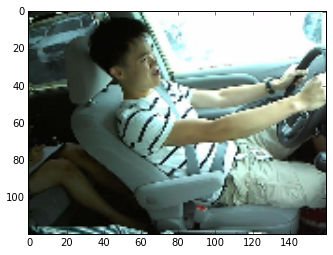

In [26]:
class_count = dict()
driver_count = dict()
total = 0
render = True
# for idx, driver in driver_list.iterrows():
for idx, driver in driver_list.head(3000).iterrows():
    img_filename = train_image_source_dir + '/' + driver['classname'] + '/' + driver['img']   
    image = caffe.io.load_image(img_filename)
    if render == True:
        print image.shape
        image = caffe.io.resize_image(image, (120, 160), interp_order = 3 )
        print image.shape
        plt.imshow(image)
        render = False
    # Track how many images we get for each class
    if driver['classname'] in class_count:
        class_count[driver['classname']] += 1
    else:
        class_count[driver['classname']] = 1
    # Track the number of drivers
    if driver['subject'] in driver_count:
        driver_count[driver['subject']] += 1
    else:
        driver_count[driver['subject']] = 1
    # Keep a running total and track progress
    total += 1
    if total % 25 == 0:
        print ".",
        
print 
print "Found the following numbers of images per class {}".format(class_count) 
print "Found the following numbers of images per driver {}".format(driver_count)
print "Total number of images found {}".format(total)